In [136]:
# <aghatpande> on 22-Nov-2017
# print all the outputs in a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [137]:
# <aghatpande> on 22-Nov-2017
# Import the necessary libraries
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler

In [138]:
# <aghatpande> on 22-Nov-2017
# Load the Data
DropBoxDF = pd.read_excel("HireArt-Data-Analyst-Exercise.xlsx")

In [139]:
# <aghatpande> on 22-Nov-2017
# User defined function to get the "Month" and "Year" part out of the date field
def getMonthYear(x):
    return str(x)[:7]

In [140]:
DropBoxDF["month-year"] = DropBoxDF["Date of Contact"].apply(lambda x: getMonthYear(x))

In [141]:
# <aghatpande> on 22-Nov-2017
# Sample data with the new column
DropBoxDF.head(5)

,Account manager,Client Name,Date of Contact,month-year
0,Rigoberto White,"Medhurst, Ankunding and Wolff",2013-10-03,2013-10
1,Chauncey Dach,Donnelly-Champlin,2013-10-04,2013-10
2,Milan Crona,"Orn, Russel and O'Reilly",2013-10-04,2013-10
3,Rigoberto White,"Fahey, Wunsch and Bashirian",2013-10-04,2013-10
4,Chauncey Dach,Koss Inc,2013-10-05,2013-10


In [142]:
# <aghatpande> on 22-Nov-2017
# Find the unique number of clients available
len(DropBoxDF["Client Name"].unique())

35

In [163]:
# <aghatpande> on 22-Nov-2017
# Find the number of clients contacted by the team per month per year. Remove the duplicates
groupbyMonthYearDF = DropBoxDF[["month-year", "Client Name"]].groupby(["month-year"], as_index=False).agg({"Client Name":"nunique"}).rename(columns={'Client Name':'Number of unique Clients contacted'})

In [164]:
groupbyMonthYearDF.head(2)

,month-year,Number of unique Clients contacted
0,2013-10,31
1,2013-11,12


In [165]:
# <aghatpande> on 22-Nov-2017
# Create a new column for percentage of clients contacted
groupbyMonthYearDF["Percentage of Clients contacted"] = groupbyMonthYearDF["Number of unique Clients contacted"]/35

In [166]:
groupbyMonthYearDF.sort_values("Percentage of Clients contacted", ascending=False).head(5)

,month-year,Number of unique Clients contacted,Percentage of Clients contacted
0,2013-10,31,0.885714
12,2014-10,28,0.800000
24,2015-10,28,0.800000
36,2016-10,25,0.714286
11,2014-09,23,0.657143


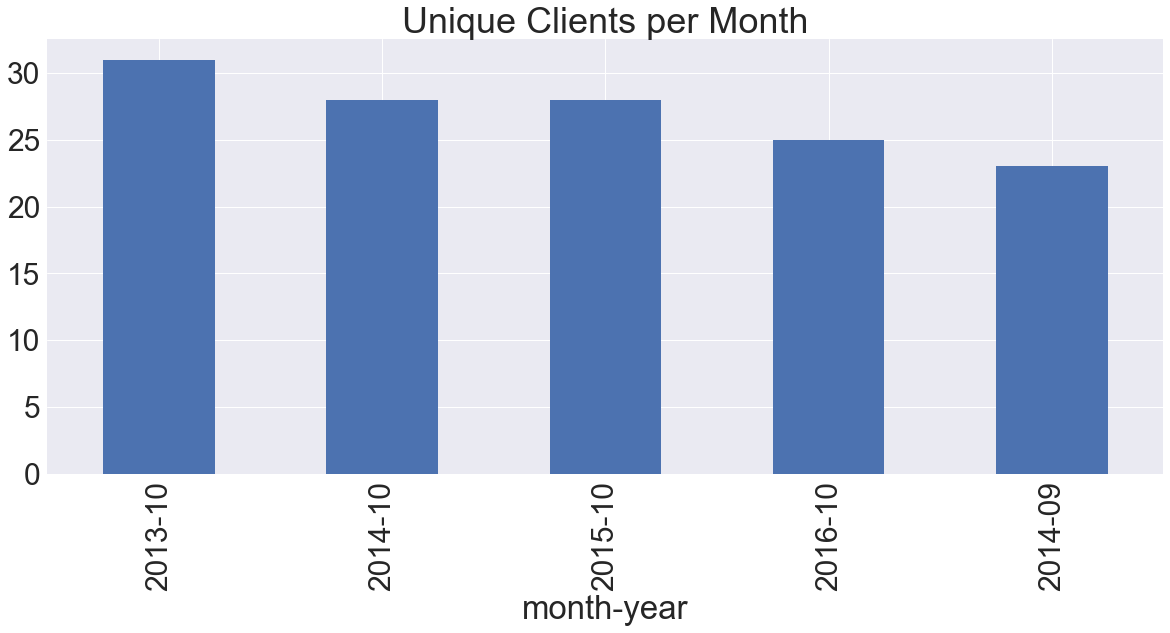

In [167]:
plt.figure(figsize=(30,10))
topgroupby = groupbyMonthYearDF.sort_values(by="Number of unique Clients contacted", ascending=False).head(5)
topgroupby.plot(kind="bar", x="month-year", y="Number of unique Clients contacted", figsize=(20,8), legend=False, title="Unique Clients per Month")